In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAWN-2011-DS0001-data-excel.tsv', sep = '\t', header = 0)

In [ ]:
df.head()

,CASEID,METRO,STRATA,PSU,REPLICATE,CASEWGT,PSUFRAME,AGECAT,SEX,RACE,YEAR,QUARTER,DAYPART,NUMSUBS,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,sdled_1_1,sdled_2_1,sdled_3_1,sdled_4_1,sdled_5_1,sdled_6_1,DRUGID_2,CATID_1_2,CATID_2_2,CATID_3_2,ROUTE_2,TOXTEST_2,sdled_1_2,sdled_2_2,sdled_3_2,sdled_4_2,sdled_5_2,sdled_6_2,DRUGID_3,CATID_1_3,CATID_2_3,CATID_3_3,ROUTE_3,TOXTEST_3,sdled_1_3,sdled_2_3,sdled_3_3,sdled_4_3,sdled_5_3,sdled_6_3,DRUGID_4,CATID_1_4,CATID_2_4,CATID_3_4,ROUTE_4,TOXTEST_4,sdled_1_4,sdled_2_4,sdled_3_4,sdled_4_4,sdled_5_4,sdled_6_4,DRUGID_5,CATID_1_5,CATID_2_5,CATID_3_5,ROUTE_5,TOXTEST_5,sdled_1_5,sdled_2_5,sdled_3_5,sdled_4_5,sdled_5_5,sdled_6_5,DRUGID_6,CATID_1_6,CATID_2_6,CATID_3_6,ROUTE_6,TOXTEST_6,sdled_1_6,sdled_2_6,sdled_3_6,sdled_4_6,sdled_5_6,sdled_6_6,DRUGID_7,CATID_1_7,CATID_2_7,CATID_3_7,ROUTE_7,TOXTEST_7,sdled_1_7,sdled_2_7,sdled_3_7,sdled_4_7,sdled_5_7,sdled_6_7,DRUGID_8,CATID_1_8,CATID_2_8,CATID_3_8,ROUTE_8,TOXTEST_8,sdled_1_8,sdled_2_8,sdled_3_8,sdled_4_8,sdled_5_8,sdled_6_8,DRUGID_9,CATID_1_9,CATID_2_9,CATID_3_9,ROUTE_9,TOXTEST_9,sdled_1_9,sdled_2_9,sdled_3_9,sdled_4_9,sdled_5_9,sdled_6_9,DRUGID_10,CATID_1_10,CATID_2_10,CATID_3_10,ROUTE_10,TOXTEST_10,sdled_1_10,sdled_2_10,sdled_3_10,sdled_4_10,sdled_5_10,sdled_6_10,DRUGID_11,CATID_1_11,CATID_2_11,CATID_3_11,ROUTE_11,TOXTEST_11,sdled_1_11,sdled_2_11,sdled_3_11,sdled_4_11,sdled_5_11,sdled_6_11,DRUGID_12,CATID_1_12,CATID_2_12,CATID_3_12,ROUTE_12,TOXTEST_12,sdled_1_12,sdled_2_12,sdled_3_12,sdled_4_12,sdled_5_12,sdled_6_12,DRUGID_13,CATID_1_13,CATID_2_13,CATID_3_13,ROUTE_13,TOXTEST_13,sdled_1_13,sdled_2_13,sdled_3_13,sdled_4_13,sdled_5_13,sdled_6_13,DRUGID_14,CATID_1_14,CATID_2_14,CATID_3_14,ROUTE_14,TOXTEST_14,sdled_1_14,sdled_2_14,sdled_3_14,sdled_4_14,sdled_5_14,sdled_6_14,DRUGID_15,CATID_1_15,CATID_2_15,CATID_3_15,ROUTE_15,TOXTEST_15,sdled_1_15,sdled_2_15,sdled_3_15,sdled_4_15,sdled_5_15,sdled_6_15,DRUGID_16,CATID_1_16,CATID_2_16,CATID_3_16,ROUTE_16,TOXTEST_16,sdled_1_16,sdled_2_16,sdled_3_16,sdled_4_16,sdled_5_16,sdled_6_16,DRUGID_17,CATID_1_17,CATID_2_17,CATID_3_17,ROUTE_17,TOXTEST_17,sdled_1_17,sdled_2_17,sdled_3_17,sdled_4_17,sdled_5_17,sdled_6_17,DRUGID_18,CATID_1_18,CATID_2_18,CATID_3_18,ROUTE_18,TOXTEST_18,sdled_1_18,sdled_2_18,sdled_3_18,sdled_4_18,sdled_5_18,sdled_6_18,DRUGID_19,CATID_1_19,CATID_2_19,CATID_3_19,ROUTE_19,TOXTEST_19,sdled_1_19,sdled_2_19,sdled_3_19,sdled_4_19,sdled_5_19,sdled_6_19,DRUGID_20,CATID_1_20,CATID_2_20,CATID_3_20,ROUTE_20,TOXTEST_20,sdled_1_20,sdled_2_20,sdled_3_20,sdled_4_20,sdled_5_20,sdled_6_20,DRUGID_21,CATID_1_21,CATID_2_21,CATID_3_21,ROUTE_21,TOXTEST_21,sdled_1_21,sdled_2_21,sdled_3_21,sdled_4_21,sdled_5_21,sdled_6_21,DRUGID_22,CATID_1_22,CATID_2_22,CATID_3_22,ROUTE_22,TOXTEST_22,sdled_1_22,sdled_2_22,sdled_3_22,sdled_4_22,sdled_5_22,sdled_6_22,CASETYPE,DISPOSITION,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,ALLABUSE
0,1,2,25,108,2,0.942635,3,4,1,2,2011,4,1,2,865,105,110,2005,1,2,1,2.0,-7.00,-7.0000,-7.0,-7.0,1255,105,114,2032,4,1,1,2.5,5.0,5.01,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7,8,6,1,1,0,0,1
1,2,2,29,129,2,5.992011,9,11,1,3,2011,3,4,1,2077,81,

In [ ]:
rows, cols = df.shape[0], df.shape[1]
rows, cols

(229211, 285)

In [ ]:
#STRATA, PSU, REPLICATE, PSUFRAME

In [ ]:
demographic_info_df = df[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE']]
case_info_df = df[['CASEID', 'CASEWGT', 'YEAR', 'QUARTER', 'DAYPART', 'NUMSUBS', 'CASETYPE', 'DISPOSITION', 'ALLABUSE']]

drug_info_cols = ['CASEID'] 
for i in range(1, 23):
  drug_info_cols.append('DRUGID_' + str(i))
  drug_info_cols.append('CATID_1_' + str(i))
  drug_info_cols.append('CATID_2_' + str(i))
  drug_info_cols.append('CATID_3_' + str(i))
  drug_info_cols.append('ROUTE_' + str(i))
  drug_info_cols.append('TOXTEST_' + str(i))
  drug_info_cols.append('sdled_1_' + str(i))
  drug_info_cols.append('sdled_2_' + str(i))
  drug_info_cols.append('sdled_3_' + str(i))
  drug_info_cols.append('sdled_4_' + str(i))
  drug_info_cols.append('sdled_5_' + str(i))
  drug_info_cols.append('sdled_6_' + str(i))

drug_info_cols.append('ALCOHOL')
drug_info_cols.append('NONALCILL')
drug_info_cols.append('PHARMA')
drug_info_cols.append('NONMEDPHARMA')


drug_info_df = df[drug_info_cols]

In [ ]:
demographic_info_df.head()

,CASEID,METRO,AGECAT,SEX,RACE
0,1,2,4,1,2
1,2,2,11,1,3
2,3,7,11,2,2
3,4,10,2,1,3
4,5,1,6,1,3


In [ ]:
demographic_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229211 entries, 0 to 229210
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   CASEID  229211 non-null  int64
 1   METRO   229211 non-null  int64
 2   AGECAT  229211 non-null  int64
 3   SEX     229211 non-null  int64
 4   RACE    229211 non-null  int64
dtypes: int64(5)
memory usage: 8.7 MB


In [ ]:
demographic_info_df.describe()

,CASEID,METRO,AGECAT,SEX,RACE
count,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000
mean,114606.000000,6.670090,7.352370,1.477289,0.278656
std,66167.660613,4.719905,2.691575,0.526280,3.463027
min,1.000000,1.000000,-8.000000,-8.000000,-8.000000
25%,57303.500000,2.000000,5.000000,1.000000,1.000000
50%,114606.000000,5.000000,8.000000,1.000000,1.000000
75%,171908.500000,12.000000,9.000000,2.000000,2.000000
max,229211.000000,14.000000,11.000000,2.000000,4.000000


-8 is not documented for agecat, sex, race

In [ ]:
len(demographic_info_df[demographic_info_df.AGECAT == -8])/rows, len(demographic_info_df[demographic_info_df.SEX == -8])/rows, len(demographic_info_df[demographic_info_df.RACE == -8])/rows

(0.0002966698805903731, 0.0003053954653136193, 0.14243644502227207)

(array([64665., 21918., 22502., 17401.,  7101.,  9115., 25278.,  2462.,
         8936., 49833.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 10 Patch objects>)

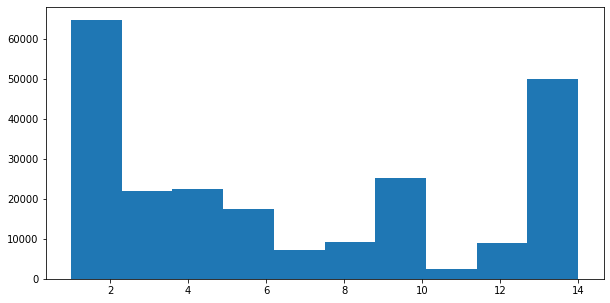

In [ ]:
plt.figure(figsize = (10, 5))
plt.hist(data = demographic_info_df, x = 'METRO')

(array([ 8744.,  2102., 11933., 17025., 18268., 22037., 19950., 36918.,
        39803., 52363.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

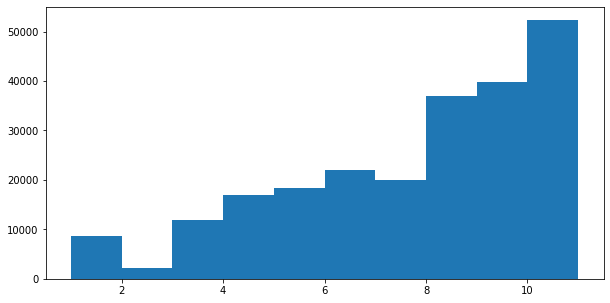

In [ ]:
demo_temp = demographic_info_df[demographic_info_df.AGECAT != -8]
plt.figure(figsize = (10, 5))
plt.hist(data = demo_temp, x = 'AGECAT')

(array([119111.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 110030.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

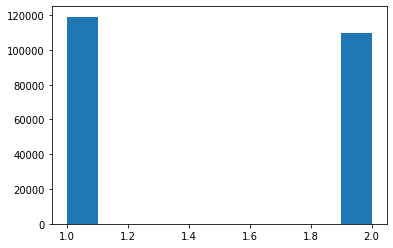

In [ ]:
demo_temp = demographic_info_df[demographic_info_df.SEX != -8]
plt.hist(data = demo_temp, x = 'SEX')

(array([109823.,      0.,      0.,  50786.,      0.,      0.,  30156.,
             0.,      0.,   5798.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

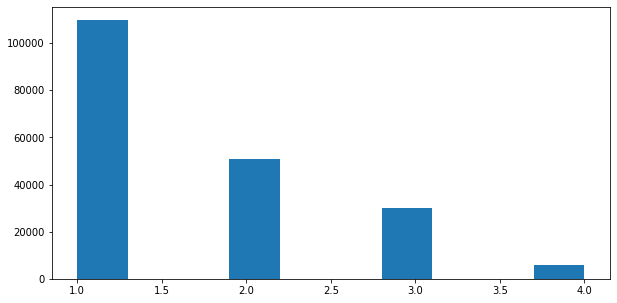

In [ ]:
demo_temp = demographic_info_df[demographic_info_df.RACE != -8]
plt.figure(figsize = (10, 5))
plt.hist(data = demo_temp, x = 'RACE')

In [ ]:
case_info_df.head()

,CASEID,CASEWGT,YEAR,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE
0,1,0.942635,2011,4,1,2,8,6,1
1,2,5.992011,2011,3,4,1,4,7,0
2,3,4.723172,2011,4,3,1,4,1,0
3,4,4.080147,2011,2,2,1,4,7,0
4,5,5.177709,2011,3,4,3,8,8,1


In [ ]:
case_info_df[case_info_df.CASETYPE == 1].head()

,CASEID,CASEWGT,YEAR,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE
23,24,3.785720,2011,3,3,1,1,6,0
72,73,5.992011,2011,3,2,2,1,1,1
112,113,3.056948,2011,4,3,3,1,8,1
140,141,3.689627,2011,2,4,2,1,8,0
170,171,5.099174,2011,4,1,2,1,4,0


In [ ]:
case_info_df.describe()

,CASEID,CASEWGT,YEAR,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE
count,229211.000000,229211.000000,229211.0,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000
mean,114606.000000,22.107901,2011.0,2.495997,2.753642,1.584104,5.377774,4.103743,0.574571
std,66167.660613,68.403862,0.0,1.104806,1.058848,1.163778,2.255081,10.315115,0.494409
min,1.000000,0.938440,2011.0,1.000000,1.000000,1.000000,1.000000,-8.000000,0.000000
25%,57303.500000,2.714999,2011.0,2.000000,2.000000,1.000000,4.000000,1.000000,0.000000
50%,114606.000000,4.190787,2011.0,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,171908.500000,7.148615,2011.0,3.000000,4.000000,2.000000,8.000000,7.000000,1.000000
max,229211.000000,862.824350,2011.0,4.000000,4.000000,22.000000,8.000000,96.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f32b37e9710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32b37f41d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32b37e9150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32b37f4c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f32b37fc210>],
 'means': []}

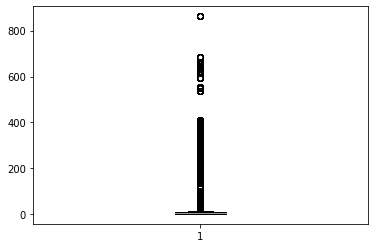

In [ ]:
plt.boxplot(data = case_info_df, x = 'CASEWGT')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32b328ce50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32b3291910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32b328c850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32b3299410>],
 'fliers': [],
 'means': []}

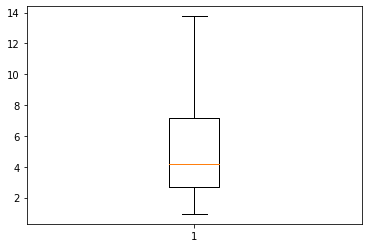

In [ ]:
plt.boxplot(data = case_info_df, x = 'CASEWGT', showfliers = False)

(array([2.1895e+05, 7.7510e+03, 1.2920e+03, 4.7100e+02, 2.6700e+02,
        1.8700e+02, 1.2100e+02, 1.1000e+02, 2.6000e+01, 3.6000e+01]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <a list of 10 Patch objects>)

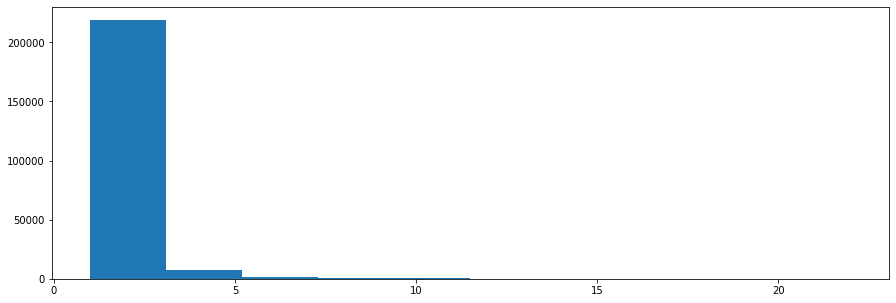

In [ ]:
plt.figure(figsize = (15, 5))
plt.hist(data = case_info_df, x = 'NUMSUBS')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32b318ac50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32b3190710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32b318a650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32b3199210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f32b3199750>],
 'means': []}

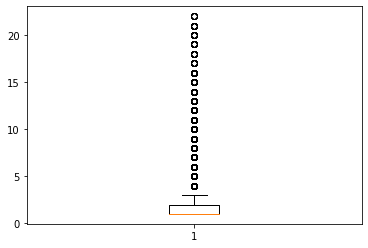

In [ ]:
plt.boxplot(data = case_info_df, x = 'NUMSUBS')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f32b3173250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f32b3173cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f32b316cc10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f32b30fa7d0>],
 'fliers': [],
 'means': []}

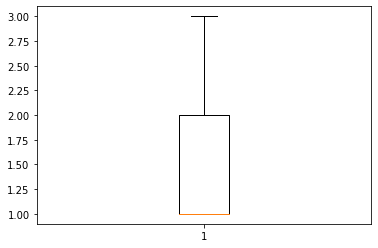

In [ ]:
plt.boxplot(data = case_info_df, x = 'NUMSUBS', showfliers = False)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


([<matplotlib.axis.XTick at 0x7f32b3025310>,
 <a list of 12 Text major ticklabel objects>)

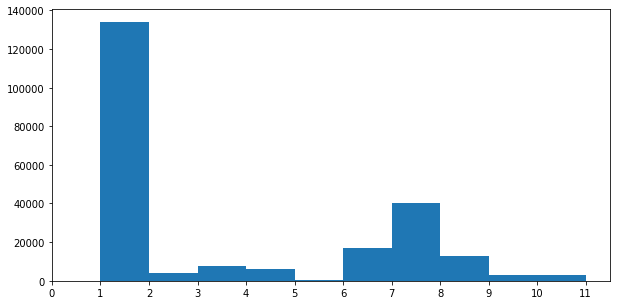

In [ ]:
demo_temp = case_info_df[case_info_df.DISPOSITION != -8]
demo_temp['DISPOSITION'].mask(demo_temp['DISPOSITION'] == 96, 11, inplace=True)
plt.figure(figsize = (10, 5))
plt.hist(data = demo_temp, x = 'DISPOSITION')
plt.xticks(np.arange(0, 12, 1))

In [ ]:
len(case_info_df[case_info_df.ALLABUSE == 0])/rows, len(case_info_df[case_info_df.ALLABUSE == 1])/rows 

(0.4254289715589566, 0.5745710284410434)

In [ ]:
demographic_case = demographic_info_df.join(case_info_df, on = ['CASEID'], how = 'left', lsuffix = '_x', rsuffix = '_y')
demographic_case = demographic_case[demographic_case.AGECAT != -8]
demographic_case.groupby(['AGECAT', 'CASETYPE']).count()[['CASEID_x']].rename(columns = {'CASEID_x' : 'COUNT'})

COUNT
AGECAT CASETYPE       
1      1.0         317
       2.0         560
       3.0         277
       4.0        3419
       5.0         672
       6.0          29
       7.0         131
       8.0        3339
2      1.0          89
       2.0         141
       3.0          55
       4.0         819
       5.0         174
       6.0           6
       7.0          23
       8.0         795
3      1.0         479
       2.0         799
       3.0         403
       4.0        4561
       5.0         902
       6.0          43
       7.0         190
       8.0        4556
4      1.0         661
       2.0        1113
       3.0         526
       4.0        6466
       5.0        1405
       6.0          56
       7.0         240
       8.0        6558
5      1.0         721
       2.0        1181
       3.0         598
       4.0        7153
       5.0        1455
       6.0          78
       7.0         254
       8.0        6828
6      1.0         816
       2.0        1406
       3.0         744
       4.0        8511
       5.0        1724
       6.0          79
       7.0         339
       8.0        8418
7      1.0         803
       2.0        1259
       3.0         695
       4.0        7466
       5.0        1637
       6.0          82
       7.0         269
       8.0        7739
8      1.0        1392
       2.0        2389
       3.0        1176
       4.0       14177
       5.0        2914
       6.0         115
       7.0         512
       8.0       14243
9      1.0        1638
       2.0        2582
       3.0        1234
       4.0       15401
       5.0        3139
       6.0         154
       7.0         544
       8.0       15111
10     1.0         919
       2.0        1564
       3.0         788
       4.0        9184
       5.0        1922
       6.0          64
       7.0         345
       8.0        9048
11     1.0        1197
       2.0        1846
       3.0         924
       4.0       10915
       5.0        2197
       6.0          87
       7.0         405
       8.0       10957

In [ ]:
drug_info_df.head()

,CASEID,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,sdled_1_1,sdled_2_1,sdled_3_1,sdled_4_1,sdled_5_1,sdled_6_1,DRUGID_2,CATID_1_2,CATID_2_2,CATID_3_2,ROUTE_2,TOXTEST_2,sdled_1_2,sdled_2_2,sdled_3_2,sdled_4_2,sdled_5_2,sdled_6_2,DRUGID_3,CATID_1_3,CATID_2_3,CATID_3_3,ROUTE_3,TOXTEST_3,sdled_1_3,sdled_2_3,sdled_3_3,sdled_4_3,sdled_5_3,sdled_6_3,DRUGID_4,CATID_1_4,CATID_2_4,CATID_3_4,ROUTE_4,TOXTEST_4,sdled_1_4,sdled_2_4,sdled_3_4,sdled_4_4,sdled_5_4,sdled_6_4,DRUGID_5,CATID_1_5,CATID_2_5,CATID_3_5,ROUTE_5,TOXTEST_5,sdled_1_5,sdled_2_5,sdled_3_5,sdled_4_5,sdled_5_5,sdled_6_5,DRUGID_6,CATID_1_6,CATID_2_6,CATID_3_6,ROUTE_6,TOXTEST_6,sdled_1_6,sdled_2_6,sdled_3_6,sdled_4_6,sdled_5_6,sdled_6_6,DRUGID_7,CATID_1_7,CATID_2_7,CATID_3_7,ROUTE_7,TOXTEST_7,sdled_1_7,sdled_2_7,sdled_3_7,sdled_4_7,sdled_5_7,sdled_6_7,DRUGID_8,CATID_1_8,CATID_2_8,CATID_3_8,ROUTE_8,TOXTEST_8,sdled_1_8,sdled_2_8,sdled_3_8,sdled_4_8,sdled_5_8,sdled_6_8,DRUGID_9,CATID_1_9,CATID_2_9,CATID_3_9,ROUTE_9,TOXTEST_9,sdled_1_9,sdled_2_9,sdled_3_9,sdled_4_9,sdled_5_9,sdled_6_9,DRUGID_10,CATID_1_10,CATID_2_10,CATID_3_10,ROUTE_10,TOXTEST_10,sdled_1_10,sdled_2_10,sdled_3_10,sdled_4_10,sdled_5_10,sdled_6_10,DRUGID_11,CATID_1_11,CATID_2_11,CATID_3_11,ROUTE_11,TOXTEST_11,sdled_1_11,sdled_2_11,sdled_3_11,sdled_4_11,sdled_5_11,sdled_6_11,DRUGID_12,CATID_1_12,CATID_2_12,CATID_3_12,ROUTE_12,TOXTEST_12,sdled_1_12,sdled_2_12,sdled_3_12,sdled_4_12,sdled_5_12,sdled_6_12,DRUGID_13,CATID_1_13,CATID_2_13,CATID_3_13,ROUTE_13,TOXTEST_13,sdled_1_13,sdled_2_13,sdled_3_13,sdled_4_13,sdled_5_13,sdled_6_13,DRUGID_14,CATID_1_14,CATID_2_14,CATID_3_14,ROUTE_14,TOXTEST_14,sdled_1_14,sdled_2_14,sdled_3_14,sdled_4_14,sdled_5_14,sdled_6_14,DRUGID_15,CATID_1_15,CATID_2_15,CATID_3_15,ROUTE_15,TOXTEST_15,sdled_1_15,sdled_2_15,sdled_3_15,sdled_4_15,sdled_5_15,sdled_6_15,DRUGID_16,CATID_1_16,CATID_2_16,CATID_3_16,ROUTE_16,TOXTEST_16,sdled_1_16,sdled_2_16,sdled_3_16,sdled_4_16,sdled_5_16,sdled_6_16,DRUGID_17,CATID_1_17,CATID_2_17,CATID_3_17,ROUTE_17,TOXTEST_17,sdled_1_17,sdled_2_17,sdled_3_17,sdled_4_17,sdled_5_17,sdled_6_17,DRUGID_18,CATID_1_18,CATID_2_18,CATID_3_18,ROUTE_18,TOXTEST_18,sdled_1_18,sdled_2_18,sdled_3_18,sdled_4_18,sdled_5_18,sdled_6_18,DRUGID_19,CATID_1_19,CATID_2_19,CATID_3_19,ROUTE_19,TOXTEST_19,sdled_1_19,sdled_2_19,sdled_3_19,sdled_4_19,sdled_5_19,sdled_6_19,DRUGID_20,CATID_1_20,CATID_2_20,CATID_3_20,ROUTE_20,TOXTEST_20,sdled_1_20,sdled_2_20,sdled_3_20,sdled_4_20,sdled_5_20,sdled_6_20,DRUGID_21,CATID_1_21,CATID_2_21,CATID_3_21,ROUTE_21,TOXTEST_21,sdled_1_21,sdled_2_21,sdled_3_21,sdled_4_21,sdled_5_21,sdled_6_21,DRUGID_22,CATID_1_22,CATID_2_22,CATID_3_22,ROUTE_22,TOXTEST_22,sdled_1_22,sdled_2_22,sdled_3_22,sdled_4_22,sdled_5_22,sdled_6_22,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA
0,1,865,105,110,2005,1,2,1,2.0,-7.00,-7.0000,-7.0,-7.0,1255,105,114,2032,4,1,1,2.5,5.0,5.01,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7,1,1,0,0
1,2,2077,81,82,283,-8,2,17,67.0,67.01,67.0140,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7.0,-7.0,-7.0,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,

*  -7 - Not applicable
* -8  - Not documented
* -9 - Missing


One-hot encode
1. METRO
2. AGECAT
3. SEX
4. RACE
5. CASETYPE
6. DISPOSITION
7. TOXTEST
8. ROUTE


Drop
1. CASEID
2. YEAR

1. DRUGID - Name of medicine taken
2. CATID - Medicines are divided into different categories and the categories are assigned to three different lists
3. SDLED - Agents present/some drug info which is again put into 6 different lists 

after removing numsubs outliers, the max number of drugs reported in any case is 3. therefore, elimiate all others and fit the other in the available columns

In [ ]:
q25, q75 = np.percentile(case_info_df['NUMSUBS'], 25), np.percentile(case_info_df['NUMSUBS'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
temp = case_info_df[(case_info_df.NUMSUBS >= lower) & (case_info_df.NUMSUBS <= upper)]

In [ ]:
temp.describe()

,CASEID,CASEWGT,YEAR,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE
count,218950.000000,218950.000000,218950.0,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000
mean,114600.514917,21.948272,2011.0,2.496529,2.752240,1.406659,5.389441,4.060671,0.567518
std,66150.414953,67.824183,0.0,1.105113,1.059012,0.631358,2.237418,10.315746,0.495422
min,1.000000,0.938440,2011.0,1.000000,1.000000,1.000000,1.000000,-8.000000,0.000000
25%,57326.250000,2.709174,2011.0,2.000000,2.000000,1.000000,4.000000,1.000000,0.000000
50%,114570.500000,4.193348,2011.0,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,171882.750000,7.162568,2011.0,3.000000,4.000000,2.000000,8.000000,7.000000,1.000000
max,229211.000000,862.824350,2011.0,4.000000,4.000000,3.000000,8.000000,96.000000,1.000000


In [ ]:
drug_info_df_temp = drug_info_df[drug_info_df.CASEID.isin(list(temp.CASEID))]

In [ ]:
cols = ['CASEID', 'DRUGID_1', 'CATID_1_1', 'CATID_2_1', 'CATID_3_1', 'ROUTE_1', 'TOXTEST_1', 'sdled_1_1', 'sdled_2_1', 'sdled_3_1', 'sdled_4_1', 'sdled_5_1', 'sdled_6_1', \
        'DRUGID_2', 'CATID_1_2', 'CATID_2_2', 'CATID_3_2', 'ROUTE_2', 'TOXTEST_2', 'sdled_1_2', 'sdled_2_2', 'sdled_3_2', 'sdled_4_2', 'sdled_5_2', 'sdled_6_2', \
        'DRUGID_3', 'CATID_1_3', 'CATID_2_3', 'CATID_3_3', 'ROUTE_3', 'TOXTEST_3', 'sdled_1_3', 'sdled_2_3', 'sdled_3_3', 'sdled_4_3', 'sdled_5_3', 'sdled_6_3', \
        'ALCOHOL', 'NONALCILL', 'PHARMA', 'NONMEDPHARMA']

reduced_drug_info_df = pd.DataFrame(columns = cols)

for idx, r in drug_info_df_temp.iterrows():
  if idx%10000 == 0:
    print(idx)
  row = [r.CASEID]
  num = 1
  for i in range(1, 23):
    if r['DRUGID_' + str(i)] != -7:
      row.append(r['DRUGID_' + str(num)])
      row.append(r['CATID_1_' + str(num)])
      row.append(r['CATID_2_' + str(num)])
      row.append(r['CATID_3_' + str(num)])
      row.append(r['ROUTE_' + str(num)])
      row.append(r['TOXTEST_' + str(num)])
      row.append(r['sdled_1_' + str(num)])
      row.append(r['sdled_2_' + str(num)])
      row.append(r['sdled_3_' + str(num)])
      row.append(r['sdled_4_' + str(num)])
      row.append(r['sdled_5_' + str(num)])
      row.append(r['sdled_6_' + str(num)])
      num += 1

  if num < 4:
    missing = [-7] * ((4-num)*12)
    row.extend(missing)

  row.append(r['ALCOHOL'])
  row.append(r['NONALCILL'])
  row.append(r['PHARMA'])
  row.append(r['NONMEDPHARMA'])

  reduced_drug_info_df = reduced_drug_info_df.append(pd.DataFrame([row], columns = cols))

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000


In [ ]:
reduced_drug_info_df.shape

(218950, 41)

In [ ]:
reduced_drug_info_df.head()

,CASEID,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,sdled_1_1,sdled_2_1,sdled_3_1,sdled_4_1,sdled_5_1,sdled_6_1,DRUGID_2,CATID_1_2,CATID_2_2,CATID_3_2,ROUTE_2,TOXTEST_2,sdled_1_2,sdled_2_2,sdled_3_2,sdled_4_2,sdled_5_2,sdled_6_2,DRUGID_3,CATID_1_3,CATID_2_3,CATID_3_3,ROUTE_3,TOXTEST_3,sdled_1_3,sdled_2_3,sdled_3_3,sdled_4_3,sdled_5_3,sdled_6_3,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA
0,1.0,865.0,105.0,110.0,2005.0,1.0,2.0,1.0,2.0,-7.00,-7.0000,-7.0,-7.0,1255.0,105.0,114.0,2032.0,4.0,1.0,1.0,2.5,5.0,5.01,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,1.0,1.0,0.0,0.0
0,2.0,2077.0,81.0,82.0,283.0,-8.0,2.0,17.0,67.0,67.01,67.0140,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,0.0,0.0,1.0,0.0
0,3.0,2313.0,1.0,12.0,-7.0,-8.0,2.0,17.0,64.0,64.99,-7.0000,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,0.0,0.0,1.0,0.0
0,4.0,234.0,358.0,99.0,215.0,2.0,2.0,17.0,73.0,73.01,73.0106,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,0.0,0.0,1.0,0.0
0,5.0,865.0,105.0,110.0,2005.0,1.0,2.0,1.0,2.0,-7.00,-7.0000,-7.0,-7.0,1253.0,105.0,114.0,2032.0,-8.0,2.0,1.0,2.5,4.0,-7.00,-7.0,-7.0,1254.0,105.0,114.0,2032.0,-8.0,1.0,1.0,2.5,3.0,-7.0,-7.0,-7.0,1.0,1.0,0.0,0.0


In [ ]:
final_df = (reduced_drug_info_df.merge(case_info_df, on = ['CASEID'], how = 'left')).merge(demographic_info_df, on = ['CASEID'], how = 'left')

In [ ]:
final_df.head()

,CASEID,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,sdled_1_1,sdled_2_1,sdled_3_1,sdled_4_1,sdled_5_1,sdled_6_1,DRUGID_2,CATID_1_2,CATID_2_2,CATID_3_2,ROUTE_2,TOXTEST_2,sdled_1_2,sdled_2_2,sdled_3_2,sdled_4_2,sdled_5_2,sdled_6_2,DRUGID_3,CATID_1_3,CATID_2_3,CATID_3_3,ROUTE_3,TOXTEST_3,sdled_1_3,sdled_2_3,sdled_3_3,sdled_4_3,sdled_5_3,sdled_6_3,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,CASEWGT,YEAR,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE,METRO,AGECAT,SEX,RACE
0,1.0,865.0,105.0,110.0,2005.0,1.0,2.0,1.0,2.0,-7.00,-7.0000,-7.0,-7.0,1255.0,105.0,114.0,2032.0,4.0,1.0,1.0,2.5,5.0,5.01,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,1.0,1.0,0.0,0.0,0.942635,2011,4,1,2,8,6,1,2,4,1,2
1,2.0,2077.0,81.0,82.0,283.0,-8.0,2.0,17.0,67.0,67.01,67.0140,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,0.0,0.0,1.0,0.0,5.992011,2011,3,4,1,4,7,0,2,11,1,3
2,3.0,2313.0,1.0,12.0,-7.0,-8.0,2.0,17.0,64.0,64.99,-7.0000,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,0.0,0.0,1.0,0.0,4.723172,2011,4,3,1,4,1,0,7,11,2,2
3,4.0,234.0,358.0,99.0,215.0,2.0,2.0,17.0,73.0,73.01,73.0106,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.00,-7.0,-7.0,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,-7,0.0,0.0,1.0,0.0,4.080147,2011,2,2,1,4,7,0,10,2,1,3
4,5.0,865.0,105.0,110.0,2005.0,1.0,2.0,1.0,2.0,-7.00,-7.0000,-7.0,-7.0,1253.0,105.0,114.0,2032.0,-8.0,2.0,1.0,2.5,4.0,-7.00,-7.0,-7.0,1254.0,105.0,114.0,2032.0,-8.0,1.0,1.0,2.5,3.0,-7.0,-7.0,-7.0,1.0,1.0,0.0,0.0,5.177709,2011,3,4,3,8,8,1,1,6,1,3


In [ ]:
final_df.describe()

,CASEID,DRUGID_1,CATID_1_1,CATID_2_1,CATID_3_1,ROUTE_1,TOXTEST_1,sdled_1_1,sdled_2_1,sdled_3_1,sdled_4_1,sdled_5_1,sdled_6_1,DRUGID_2,CATID_1_2,CATID_2_2,CATID_3_2,ROUTE_2,TOXTEST_2,sdled_1_2,sdled_2_2,sdled_3_2,sdled_4_2,sdled_5_2,sdled_6_2,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,CASEWGT,YEAR,QUARTER,DAYPART,NUMSUBS,CASETYPE,DISPOSITION,ALLABUSE,METRO,AGECAT,SEX,RACE
count,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.0,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000,218950.000000
mean,114600.514917,1031.626600,168.844745,106.481192,1071.883444,-4.521096,1.503421,10.509166,31.428509,28.623625,18.694126,4.609176,-3.434299,363.611359,60.070669,27.071048,384.778246,-6.466801,-4.282448,-1.511879,3.582046,3.158842,1.080639,-1.634970,-5.565601,0.187865,0.337899,0.676410,0.215323,21.948272,2011.0,2.496529,2.752240,1.406659,5.389441,4.060671,0.567518,6.660580,7.340292,1.477474,0.277611
std,66150.414953,751.893793,372.704136,169.491369,965.135770,6.415982,2.056819,7.856379,28.331955,29.765328,29.396084,20.356159,12.120039,672.268321,267.535903,73.862572,788.466052,4.123680,4.134504,9.084343,20.879727,19.923990,18.633951,15.152628,7.876836,0.390605,0.472995,0.467847,0.411047,67.824183,0.0,1.105113,1.059012,0.631358,2.237418,10.315746,0.495422,4.722255,2.707777,0.527121,3.473540
min,1.000000,1.000000,1.000000,-7.000000,-7.000000,-9.000000,-9.000000,1.000000,2.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-9.000000,-9.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.938440,2011.0,1.000000,1.000000,1.000000,1.000000,-8.000000,0.000000,1.000000,-8.000000,-8.000000,-8.000000
25%,57326.250000,339.000000,57.000000,58.000000,69.000000,-8.000000,2.000000,1.000000,2.500000,3.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-8.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,2.709174,2011.0,2.000000,2.000000,1.000000,4.000000,1.000000,0.000000,2.000000,5.000000,1.000000,1.000000
50%,114570.500000,865.000000,105.000000,104.000000,2005.000000,-8.000000,2.000000,17.000000,33.000000,34.000000,5.010000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,0.000000,0.000000,1.000000,0.000000,4.193348,2011.0,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000,5.000000,8.000000,1.000000,1.000000
75%,171882.750000,1255.000000,105.000000,114.000000,2032.000000,1.000000,2.000000,17.000000,64.000000,62.000000,44.070000,20.710000,-7.000000,461.000000,57.000000,58.000000,69.000000,-7.000000,2.000000,1.000000,2.500000,3.000000,-7.000000,-7.000000,-7.000000,0.000000,1.000000,1.000000,0.000000,7.162568,2011.0,3.000000,4.000000,2.000000,8.000000,7.000000,1.000000,12.000000,9.000000,2.000000,2.000000
max,229211.000000,2558.000000,2041.000000,2051.000000,2056.000000,98.000000,2.000000,17.000000,79.000000,78.090000,78.093000,62.159000,41.504000,2558.000000,2041.000000,2051.000000,2055.000000,98.000000,2.000000,17.000000,79.000000,78.090000,78.093000,62.151000,41.504000,1.000000,1.000000,1.000000,1.000000,862.824350,2011.0,4.000000,4.000000,3.000000,8.000000,96.000000,1.000000,14.000000,11.000000,2.000000,4.000000


In [ ]:
final_df.shape

(218950, 53)

In [ ]:
  final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/drug_data.csv')